In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-mental-health-survey/MentalHealthSurvey.csv


Importando pandas e lendo os dados:

In [99]:
import pandas as pd

df = pd.read_csv('/kaggle/input/student-mental-health-survey/MentalHealthSurvey.csv')


Vizualização dos dados:

In [100]:
print(df.head())


   gender  age university   degree_level      degree_major academic_year  \
0    Male   20         PU  Undergraduate      Data Science      2nd year   
1    Male   20        UET   Postgraduate  Computer Science      3rd year   
2    Male   20       FAST  Undergraduate  Computer Science      3rd year   
3    Male   20        UET  Undergraduate  Computer Science      3rd year   
4  Female   20        UET  Undergraduate  Computer Science      3rd year   

      cgpa residential_status campus_discrimination sports_engagement  ...  \
0  3.0-3.5         Off-Campus                    No         No Sports  ...   
1  3.0-3.5         Off-Campus                    No         1-3 times  ...   
2  2.5-3.0         Off-Campus                    No         1-3 times  ...   
3  2.5-3.0          On-Campus                    No         No Sports  ...   
4  3.0-3.5         Off-Campus                   Yes         No Sports  ...   

  study_satisfaction  academic_workload   academic_pressure  \
0          

Tipos de dados:

In [101]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

Estatística para descrever dataset:

In [102]:
print(df.describe())


             age  study_satisfaction  academic_workload   academic_pressure  \
count  87.000000           87.000000           87.000000          87.000000   
mean   19.942529            3.931034            3.885057           3.781609   
std     1.623636            1.043174            0.854880           1.125035   
min    17.000000            1.000000            2.000000           1.000000   
25%    19.000000            3.000000            3.000000           3.000000   
50%    20.000000            4.000000            4.000000           4.000000   
75%    21.000000            5.000000            4.500000           5.000000   
max    26.000000            5.000000            5.000000           5.000000   

       financial_concerns  social_relationships  depression    anxiety  \
count           87.000000             87.000000   87.000000  87.000000   
mean             3.390805              2.781609    3.218391   3.218391   
std              1.400634              1.175578    1.367609   1.29

Importar Matplotlib e Seaborn
Gráfico de academic pressure

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


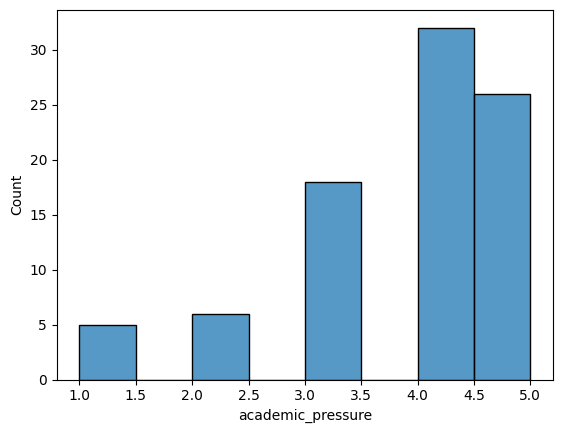

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['academic_pressure'])
plt.show()

Gráfico de campus_discrimination:


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


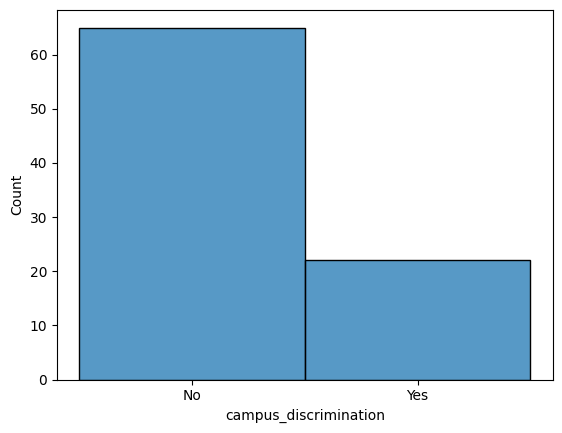

In [104]:
sns.histplot(df['campus_discrimination'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


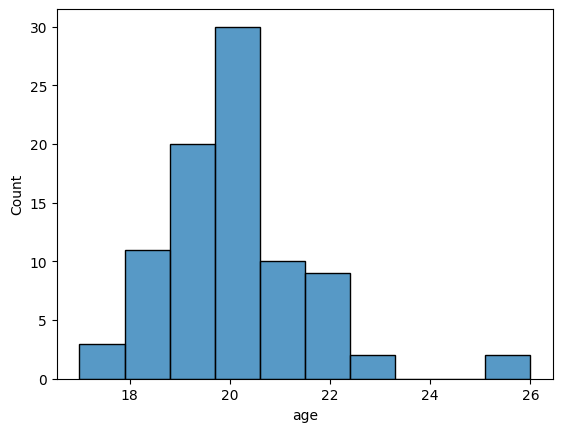

In [105]:
sns.histplot(df['age'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


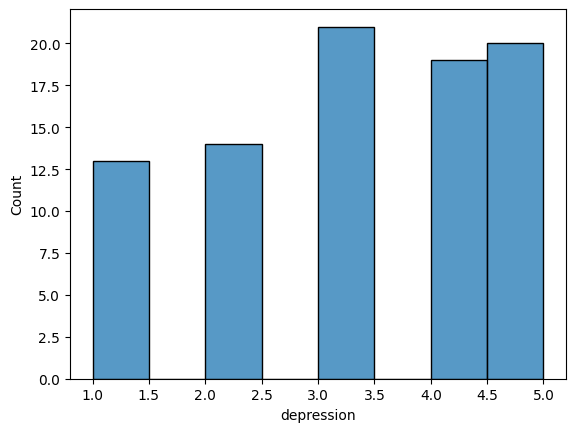

In [106]:
sns.histplot(df['depression'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


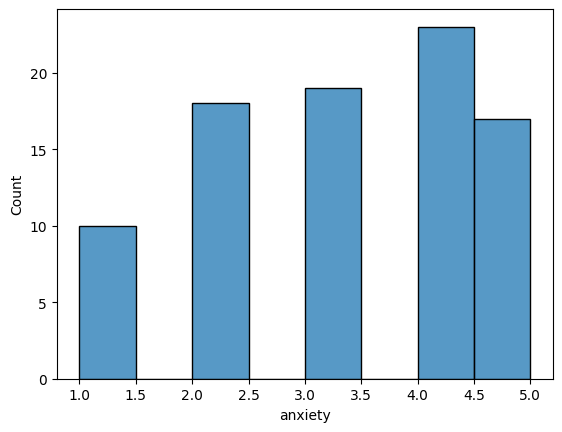

In [107]:
sns.histplot(df['anxiety'])
plt.show()

Variáveis relevantes:

In [108]:
X = df[['age', 'study_satisfaction']]
y = df['anxiety']


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc



Separando features e labels


In [110]:
X = df[['anxiety']]
y = df['age']


Dividindo os dados em treino e teste:

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Verificando valores x e y:

In [112]:
print("Primeiras linhas de X:")
print(X.head())

print("Primeiras linhas de y:")
print(y.head())


Primeiras linhas de X:
   anxiety
0        1
1        3
2        3
3        5
4        5
Primeiras linhas de y:
0    20
1    20
2    20
3    20
4    20
Name: age, dtype: int64


Números de amostras em x e y

In [113]:
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

Número de amostras em X: 87
Número de amostras em y: 87


Criando e treinando o modelo:

In [114]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Fazendo previsões:

In [115]:
predictions = model.predict(X_test)

Avaliando modelo:

In [117]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.4074074074074074


Relatório de classificação:

In [119]:

print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

          18       0.00      0.00      0.00         3
          19       0.33      0.20      0.25         5
          20       0.42      0.91      0.57        11
          21       0.00      0.00      0.00         5
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2

    accuracy                           0.41        27
   macro avg       0.12      0.18      0.14        27
weighted avg       0.23      0.41      0.28        27



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusão:

In [120]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[ 0  0  3  0  0  0]
 [ 0  1  4  0  0  0]
 [ 0  1 10  0  0  0]
 [ 0  1  4  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  2  0  0  0]]


Validação cruzada:

In [122]:
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Média da validação cruzada: {scores.mean()}')

Cross-validation scores: [0.33333333 0.27777778 0.29411765 0.35294118 0.41176471]
Média da validação cruzada: 0.3339869281045752


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
